In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx')
print(df.head())

   T_540_0   X_540_0   Y_540_0      T   X_540_2   Y_540_2   X_540_4   Y_540_4  \
0    0.000  0.007978 -0.004185  0.000  0.004861 -0.012294 -0.003488 -0.006104   
1    0.001  0.017308 -0.001700  0.001 -0.001635 -0.012272  0.003858 -0.008000   
2    0.002 -0.005820  0.000828  0.002 -0.002049 -0.014736 -0.003880 -0.005166   
3    0.003 -0.005166 -0.000610  0.003  0.001831 -0.011618 -0.002943 -0.005689   
4    0.004  0.018245  0.001504  0.004 -0.007411 -0.008741  0.005973 -0.002005   

    X_540_6   Y_540_6  ...  X_940_10  Y_940_10  X_940_11  Y_940_11  X_940_12  \
0 -0.001134  0.003619  ...  0.003728  0.001003  0.002005 -0.004992  0.007368   
1 -0.000981  0.003553  ...  0.004817 -0.000523  0.002659 -0.002790  0.013885   
2  0.002005  0.006670  ... -0.007368 -0.003967 -0.000828  0.002616  0.006452   
3  0.005711  0.002550  ...  0.002005 -0.000785 -0.003292  0.004294  0.002005   
4  0.003379 -0.001635  ...  0.005995 -0.002768 -0.001853  0.002529  0.006234   

   Y_940_12  X_940_-2  Y_940_-2 

In [3]:
z1 = np.polyfit(df.T_540_0, df.X_540_0,2)
z2 = np.polyfit(df.T_540_0, df.Y_540_0,2)

Text(0.5, 0.98, 'Drift Calculation at RPM 540')

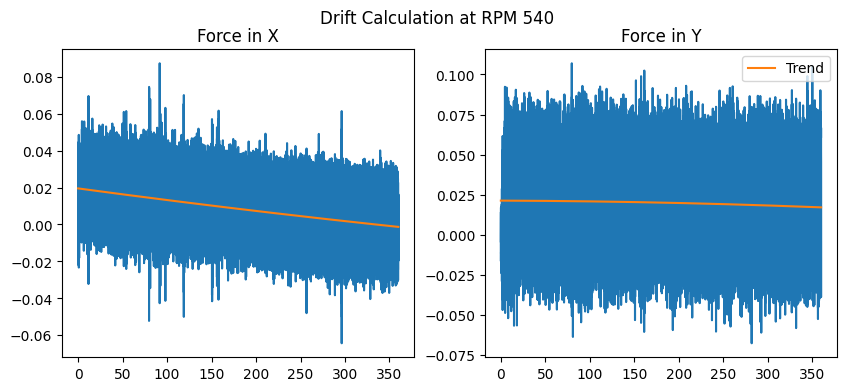

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(df.T_540_0, df.X_540_0)
plt.plot(df.T_540_0, z1[0]*df.T_540_0**2+z1[1]*df.T_540_0 + z1[2], label='Trend')
plt.title('Force in X')
plt.subplot(1,2,2)
plt.plot(df.T_540_0, df.Y_540_0)
plt.plot(df.T_540_0, z2[0]*df.T_540_0**2+z2[1]*df.T_540_0 + z2[2], label='Trend')
plt.title('Force in Y')
plt.legend()
plt.suptitle('Drift Calculation at RPM 540')

In [5]:
z1 = np.polyfit(df.T_940_0, df.X_940_0,2)
z2 = np.polyfit(df.T_940_0, df.Y_940_0,2)

Text(0.5, 0.98, 'Drift Calculation at RPM 940')

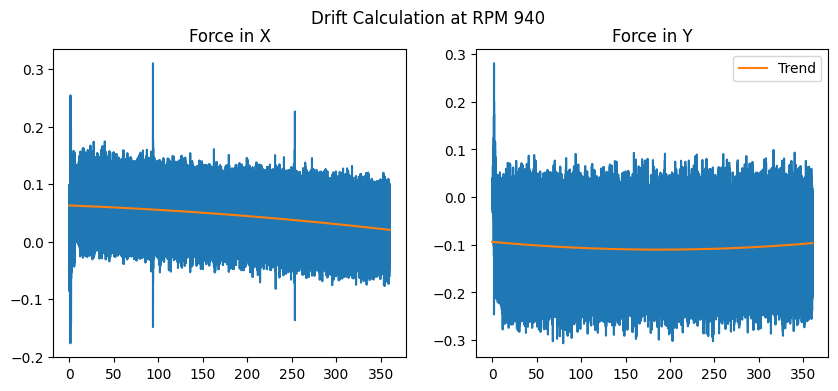

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(df.T_940_0, df.X_940_0)
plt.plot(df.T_940_0, z1[0]*df.T_940_0**2+z1[1]*df.T_940_0 + z1[2], label='Trend')
plt.title('Force in X')
plt.subplot(1,2,2)
plt.plot(df.T_940_0, df.Y_940_0)
plt.plot(df.T_940_0, z2[0]*df.T_940_0**2+z2[1]*df.T_940_0 + z2[2], label='Trend')
plt.title('Force in Y')
plt.legend()
plt.suptitle('Drift Calculation at RPM 940')

In [12]:
idx = np.where(df['T']==30)
print(df['T'][idx[0][0]:])

30000     30.000
30001     30.001
30002     30.002
30003     30.003
30004     30.004
           ...  
359995       NaN
359996       NaN
359997       NaN
359998       NaN
359999       NaN
Name: T, Length: 330000, dtype: float64


In [16]:
aoa = np.array([-4, -2, 0, 2, 4, 6, 8, 9, 10, 11, 12])
l540 = []
d540 = []
l940 = []
d940 = []
for i in range(len(aoa)):
    X540 = np.mean(df['X_540_{}'.format(aoa[i])][idx[0][0]:])
    Y540 = np.mean(df['Y_540_{}'.format(aoa[i])][idx[0][0]:])
    X940 = np.mean(df['X_940_{}'.format(aoa[i])][idx[0][0]:])
    Y940 = np.mean(df['Y_940_{}'.format(aoa[i])][idx[0][0]:])
    l540.append(-X540*np.sin(aoa[i]*np.pi/180) - Y540*np.cos(aoa[i]*np.pi/180))
    d540.append(X540*np.cos(aoa[i]*np.pi/180) - Y540*np.sin(aoa[i]*np.pi/180))
    l940.append(-X940*np.sin(aoa[i]*np.pi/180) - Y940*np.cos(aoa[i]*np.pi/180))
    d940.append(X940*np.cos(aoa[i]*np.pi/180) - Y940*np.sin(aoa[i]*np.pi/180))

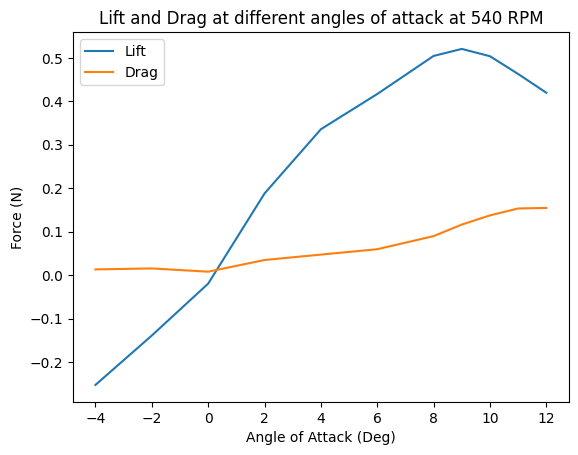

In [17]:
plt.plot(aoa, l540, label='Lift')
plt.plot(aoa, d540, label='Drag')
plt.title('Lift and Drag at different angles of attack at 540 RPM')
plt.xlabel('Angle of Attack (Deg)')
plt.ylabel('Force (N)')
plt.legend()

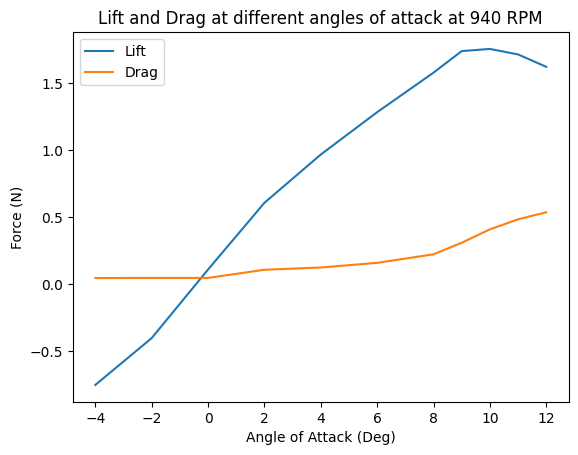

In [18]:
plt.plot(aoa, l940, label='Lift')
plt.plot(aoa, d940, label='Drag')
plt.title('Lift and Drag at different angles of attack at 940 RPM')
plt.xlabel('Angle of Attack (Deg)')
plt.ylabel('Force (N)')
plt.legend()